In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt



a. Loading and pre-processing the Data

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#Normalize the data to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0


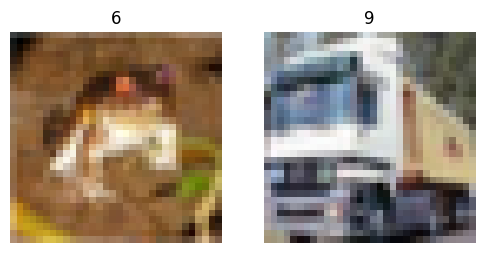

In [4]:
plt.figure(figsize=(6,3))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i][0])
    plt.axis('off')
plt.show()

In [5]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


b. Define the Model Architecture

In [7]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\muggs\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


c. Training the Model

In [8]:
train = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4126 - loss: 1.6258 - val_accuracy: 0.6047 - val_loss: 1.1311
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6300 - loss: 1.0599 - val_accuracy: 0.6582 - val_loss: 0.9803
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6838 - loss: 0.9012 - val_accuracy: 0.6788 - val_loss: 0.9239
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7180 - loss: 0.7981 - val_accuracy: 0.6966 - val_loss: 0.8764
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7510 - loss: 0.7109 - val_accuracy: 0.6939 - val_loss: 0.8877
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7812 - loss: 0.6274 - val_accuracy: 0.7010 - val_loss: 0.8988
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8074 - loss: 0.5527 - val_accuracy: 0.7054 - val_loss: 0.9146
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8344 -

d. Evaluating Model performance

In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7105 - loss: 1.0147
Test accuracy: 70.01%


Plotting the training loss and accuracy

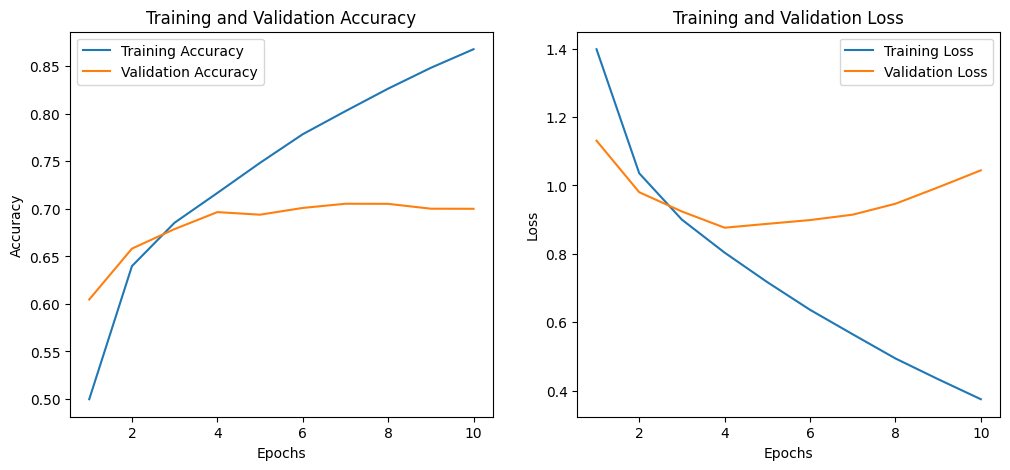

In [11]:
epochs =range(1,11)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs,train.history['accuracy'],label='Training Accuracy')
plt.plot(epochs,train.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')   

plt.subplot(1,2,2)
plt.plot(epochs,train.history['loss'],label='Training Loss')
plt.plot(epochs,train.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


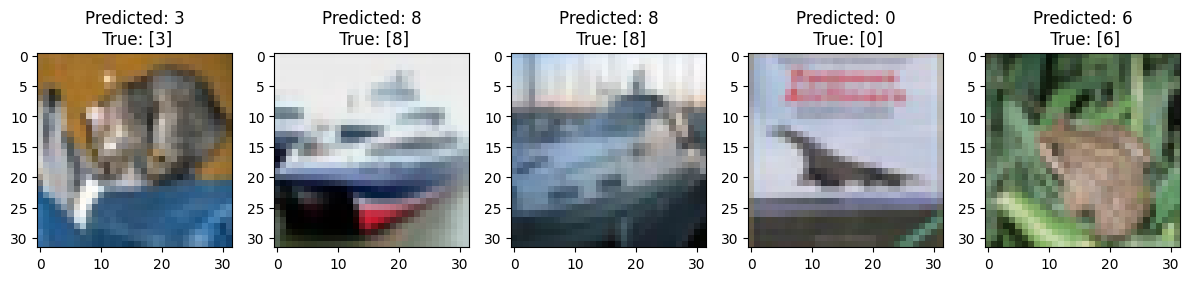

In [13]:
num = 5
plt.figure(figsize=(12, 8))
predictions = model.predict(x_test[:num])
for i in range(num):
    true_label = y_test[i]
    plt.subplot(1,num,i+1)
    plt.imshow(x_test[i])
    plt.title(f'Predicted: {predictions[i].argmax()}\n True: {true_label}')

plt.tight_layout()
plt.show()
